In [2]:
!pip install pyreadstat

In [3]:
import requests
import json
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt

In [5]:
host = 'dataverse.ada.edu.au'                  # All clients >4.0 are supported
token = 'xxx Insert Personal Token Herexxx'  # Generated at /account/apitoken
headers = {'X-Dataverse-key' : token }

In [6]:
# Get the datacerse, datasets and filesi for AES dataverse
url = 'https://dataverse.ada.edu.au/api/search?q=AES&type=dataverse&type=dataset&type=file&per_page=10&sort=name&order=asc'
r1 = requests.get(url, headers = headers)
data = json.loads(r1.content).get('data')
#print(data['items'])

In [7]:
# Get the dataset by doi
url = 'https://dataverse.ada.edu.au/api/datasets/:persistentId/?persistentId=doi:10.4225/87/7OZCZA'
r1 = requests.get(url, headers = headers)
data = json.loads(r1.content).get('data')
#print(data)

In [8]:
# Get the files for dataset with specified dataset id
# Extract tte dataset id
dsid  = data.get('id')
url = 'https://dataverse.ada.edu.au/api/datasets/{id}/versions/:latest/files'.format(id=dsid)
r1 = requests.get(url, headers = headers)
data = json.loads(r1.content).get('data')
#print(data)

In [9]:
fileid = data[8].get('dataFile').get('id')
url = 'https://dataverse.ada.edu.au/api/access/datafile/{id}?format=original'.format(id=fileid)
r1 = requests.get(url, headers = headers)
data = r1.content
#print(data)

In [10]:
# Save the data
aes_file = open('aes_file.sav', mode='wb')
aes_file.write(r1.content)

3291918

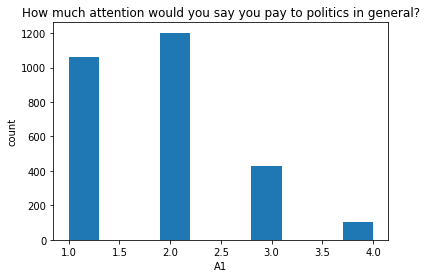

In [12]:
# read the saved file, and plot histogram count
df, meta = pyreadstat.read_sav('aes_file.sav')
c1 = df.A1.value_counts(dropna=False, ascending=True)
cat_values = meta.variable_value_labels['A1']
n, bins, patches = plt.hist(x=df.A1)
plt.title("How much attention would you say you pay to politics in general?")
plt.xlabel('A1')
plt.ylabel('count')
plt.show()

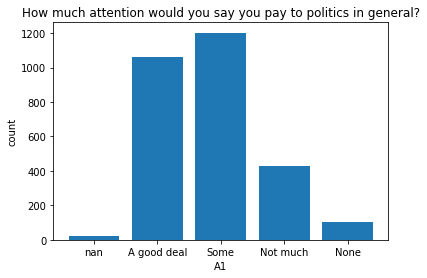

In [13]:
# plot the bar-chart with labels
r1 = { cat_values[i] if str(i) != 'nan' else 'nan': c1[i] for i in sorted(c1.keys()) }
plt.bar(r1.keys(), r1.values())
plt.title("How much attention would you say you pay to politics in general?")
plt.xlabel('A1')
plt.ylabel('count')
plt.show()
